In [ ]:
# Import libraries 

import pandas as pd
import numpy as np
import scipy as sp 
import math
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
# Set seaborn plotting defaults
sns.set(context='talk', font_scale=0.9, style='whitegrid', palette='Blues_d')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Clone GitHub repo

fatal: destination path 'COVID19' already exists and is not an empty directory.


In [ ]:
# change directory 
%cd /content/COVID19/data/processed

/content/COVID19/data/processed


In [ ]:
%ls # copy the name of the excel files you'll need 

In [ ]:
# Import Files 
df = pd.read_excel('PADDED_Dataset_2020_08_10_GE50_Deaths.xlsx')
df7all = pd.read_excel('7DaySmooth_ALLVars_Dataset_2020_08_10_GE50_Deaths.xlsx')


# Drop unnecessary index columns 
# df.drop(columns='Unnamed: 0',axis=1,inplace=True); df3.drop(columns='Unnamed: 0',axis=1,inplace=True); df7.drop(columns='Unnamed: 0',axis=1,inplace=True); df3all.drop(columns='Unnamed: 0',axis=1,inplace=True); 
df.drop(columns='Unnamed: 0',axis=1,inplace=True)
df7all.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [ ]:
# Tropic of Cancer is located at 23.5 degrees north of the equator and runs through Mexico, the Bahamas, Egypt, Saudi Arabia, India, and southern China
# The Tropic of Capricorn lies at 23.5 degrees south of the equator and runs through Australia, Chile, southern Brazil, and northern South Africa

upper_lat_bound = 23.5; lower_lat_bound = -23.5 

n_hem = df7all[df7all['Lat']>upper_lat_bound]
s_hem = df7all[df7all['Lat']<lower_lat_bound]
trop  = df7all[(df7all['Lat']<upper_lat_bound) & (df7all['Lat']>lower_lat_bound)]

In [ ]:
print('Total Country Count:',df['Country'].unique().shape[0])
print('Northern Hemisphere Country Count:',n_hem['Country'].unique().shape[0])
print('Southern Hemisphere Country Count:',s_hem['Country'].unique().shape[0])
print('Tropics Country Count:',trop['Country'].unique().shape[0])

Total Country Count: 125
Northern Hemisphere Country Count: 69
Southern Hemisphere Country Count: 5
Tropics Country Count: 51


In [ ]:
# sns.set(context='talk', font_scale=0.9, style='whitegrid', palette='Greys_d')
# sns.set_style({'axes.edgecolor':'black'})

In [ ]:
sns.set(context='talk', font_scale=0.9, style='ticks', palette='Blues_d')
import matplotlib.dates as md

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

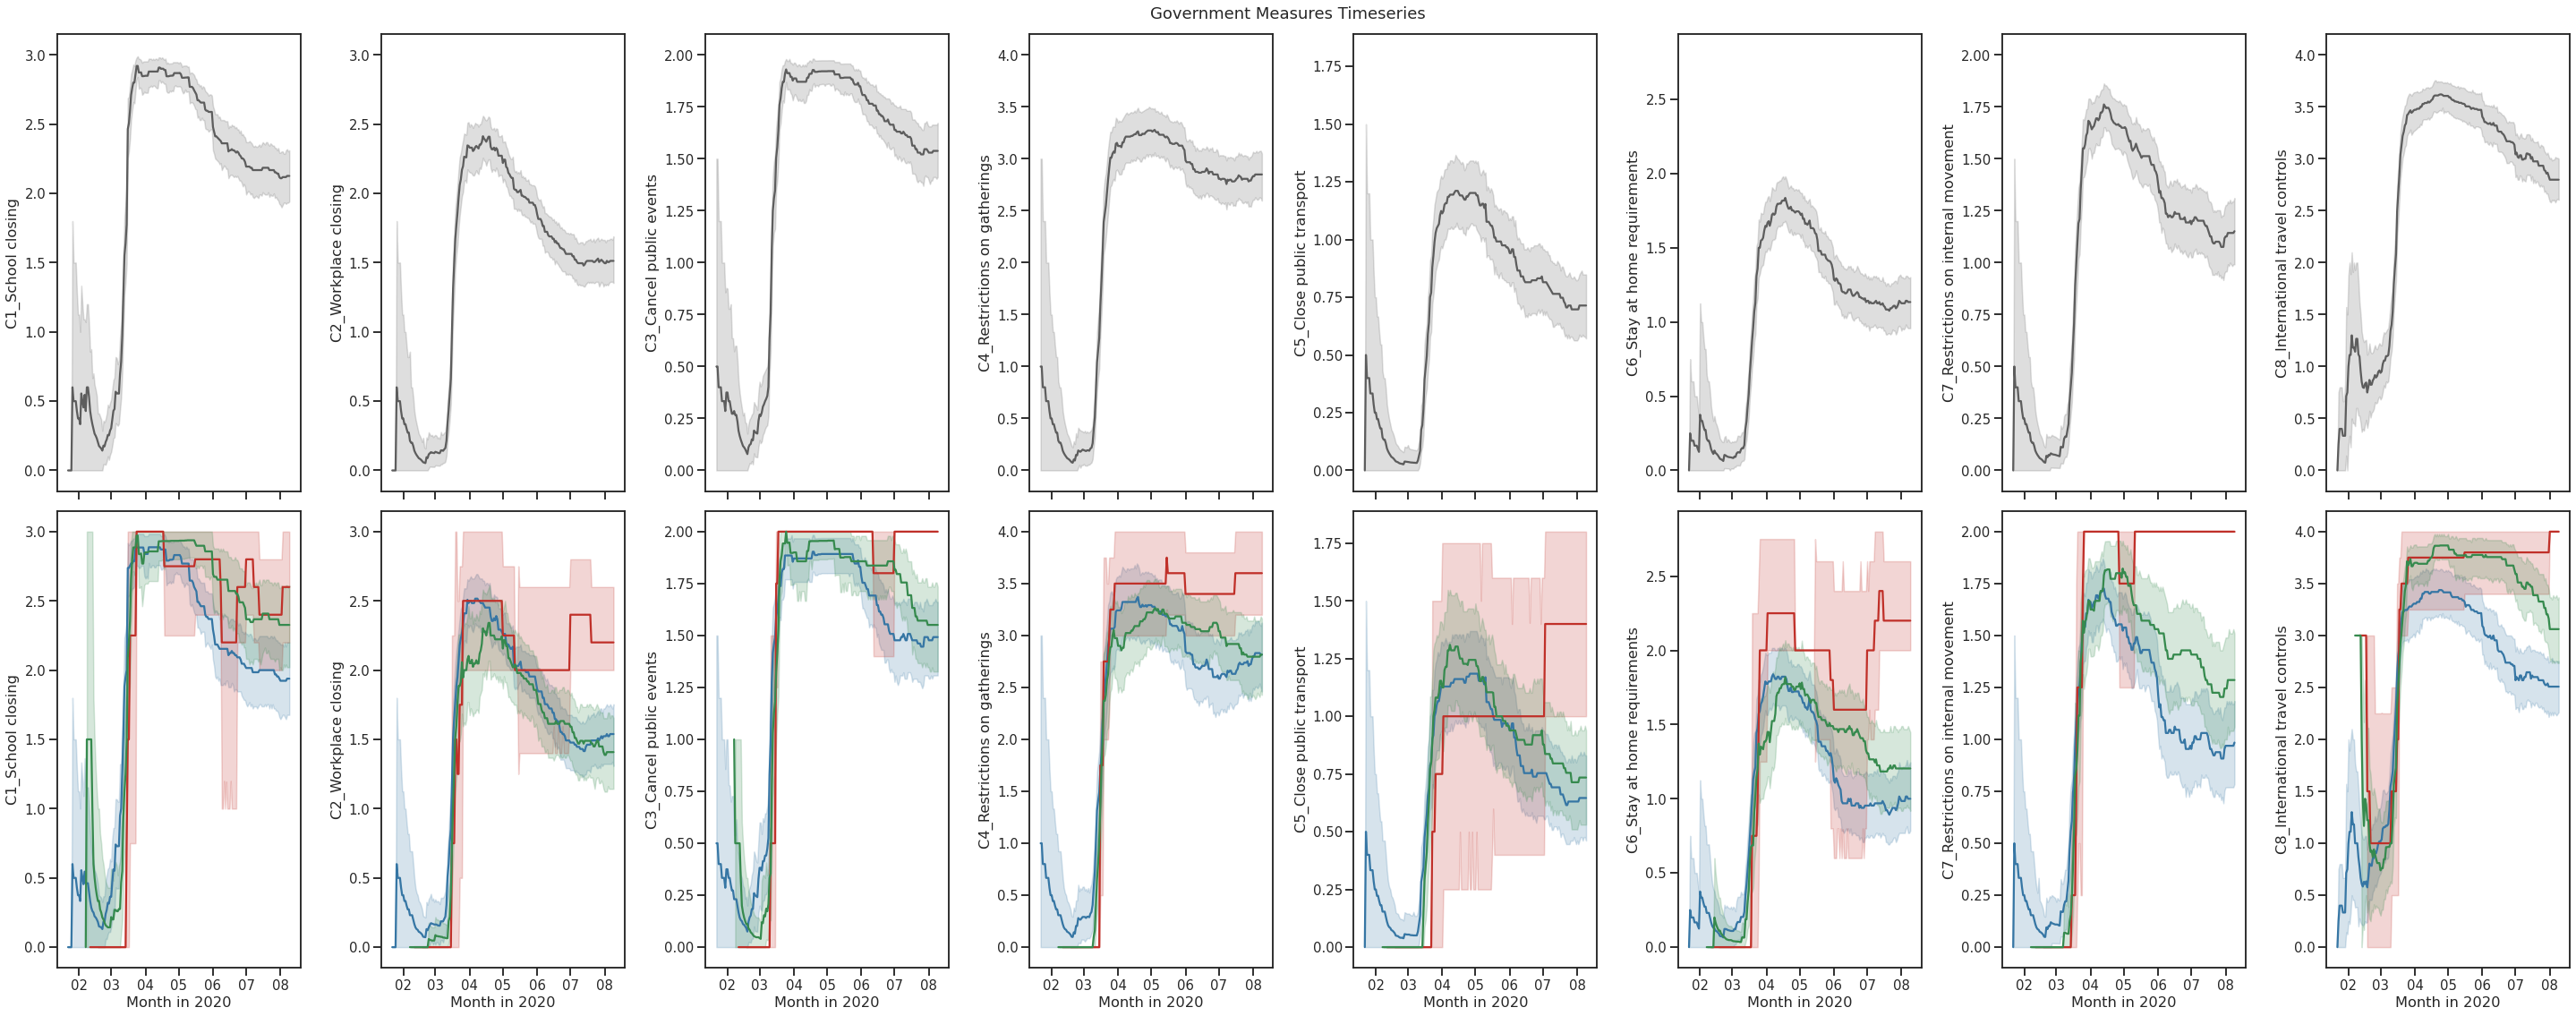

In [ ]:
# Set up the plotting 
measures = ['C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events','C4_Restrictions on gatherings', 'C5_Close public transport','C6_Stay at home requirements', 'C7_Restrictions on internal movement','C8_International travel controls']
rows = 2; cols = len(measures); fig,ax=plt.subplots(rows,cols,figsize=(len(measures)*5,rows*8),sharex=True,sharey='col')

#points = []; lines=[]
# Go through each quantized outbreak metric and make plots 
for col in range(0,cols):
  sns.lineplot(x='Date',y=measures[col],data=df7all,ax=ax[0,col],legend=False,color=sns.color_palette(palette='Greys_d',n_colors=4)[1],label='All')
  sns.lineplot(x='Date',y=measures[col],data=n_hem,ax=ax[1,col],legend=False,color=sns.color_palette(palette='Blues_d',n_colors=4)[1],label='N. Hem')
  sns.lineplot(x='Date',y=measures[col],data=s_hem,ax=ax[1,col],legend=False,color=sns.color_palette(palette='Reds_d',n_colors=4)[1],label='S. Hem')
  sns.lineplot(x='Date',y=measures[col],data=trop,ax=ax[1,col],legend=False,color=sns.color_palette(palette='Greens_d',n_colors=4)[1],label='Trop')

# Define X axis labels 
[ax.set_xlabel('Month in 2020') for ax in plt.gcf().axes]
#ax[1,0].set_xlabel('Month in 2020'); ax[3,1].set_xlabel('Month in 2020'); ax[3,2].set_xlabel('Month in 2020'); ax[3,3].set_xlabel('Month in 2020')
# Format X axis tick labels 
[ax.xaxis.set_major_formatter(md.DateFormatter('%m')) for ax in plt.gcf().axes]
# Tight layout 
fig.suptitle('Government Measures Timeseries' , fontsize=18)
fig.tight_layout(pad=0.5, w_pad=1.5, h_pad=0.8,rect=[0, 0, 1, 0.96])

# from google.colab import files
# filename = ('Supplemental_GovernmentC_Timeseries_All_NH_SH_Tr.png')
# fig.savefig(filename, dpi=300)
# files.download(filename) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

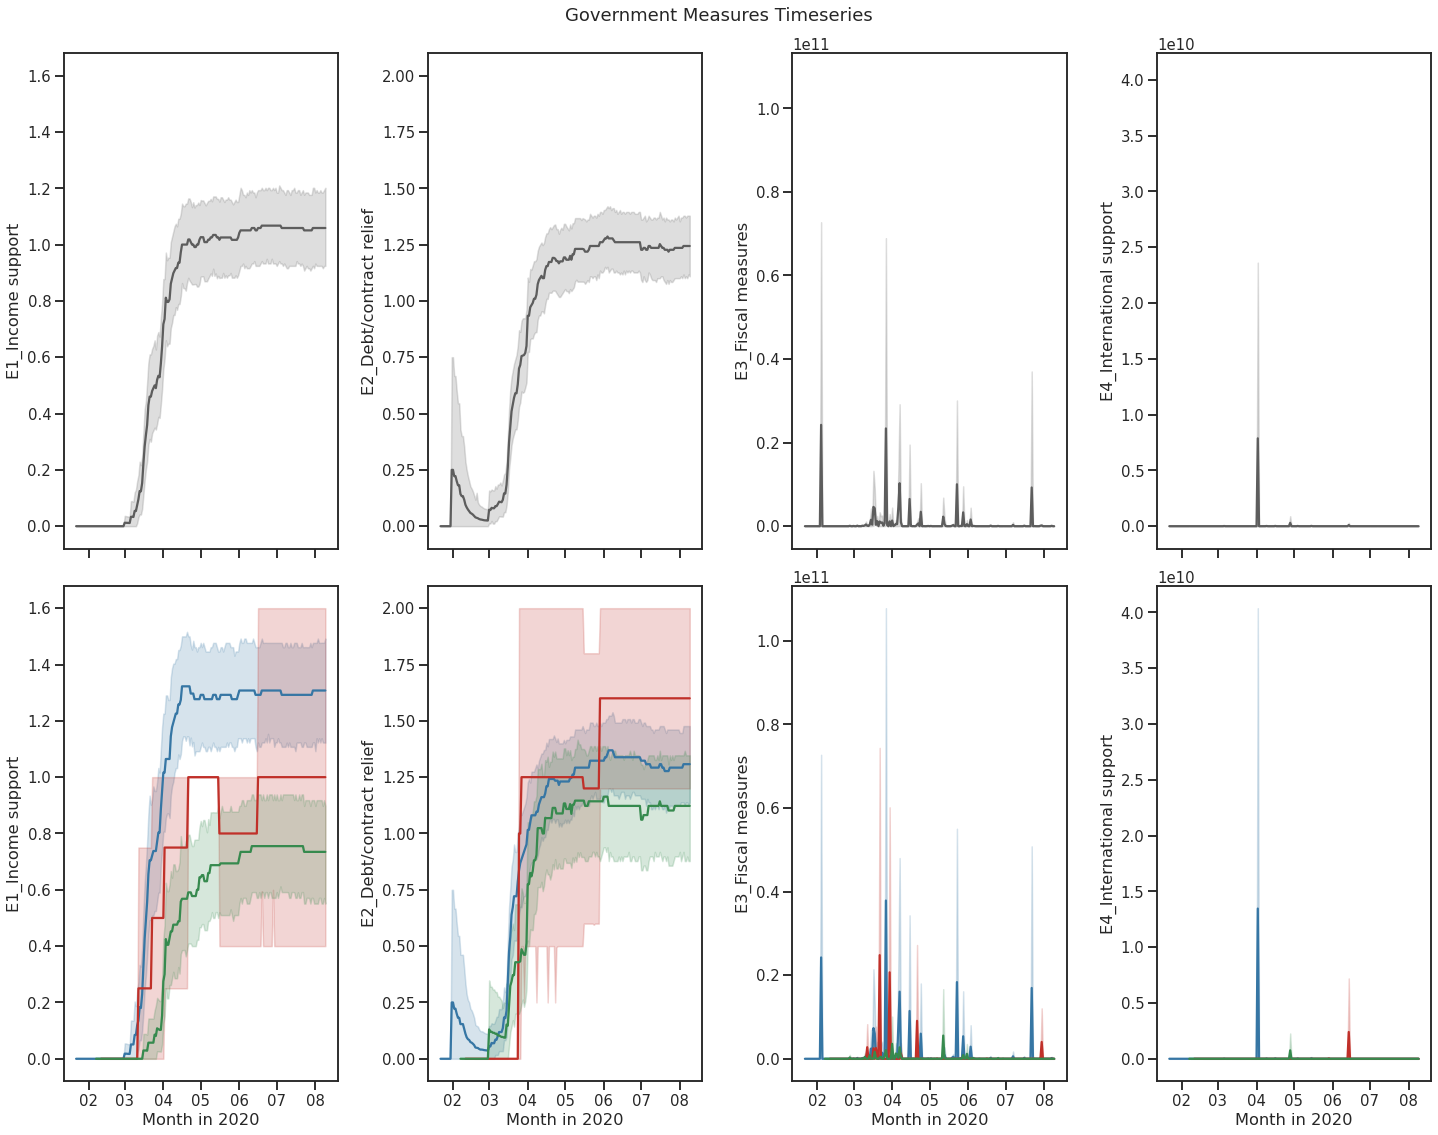

In [ ]:
# Set up the plotting 
measures = ['E1_Income support','E2_Debt/contract relief','E3_Fiscal measures','E4_International support',]
rows = 2; cols = len(measures); fig,ax=plt.subplots(rows,cols,figsize=(len(measures)*5,rows*8),sharex=True,sharey='col')

#points = []; lines=[]
# Go through each quantized outbreak metric and make plots 
for col in range(0,cols):
  sns.lineplot(x='Date',y=measures[col],data=df7all,ax=ax[0,col],legend=False,color=sns.color_palette(palette='Greys_d',n_colors=4)[1],label='All')
  sns.lineplot(x='Date',y=measures[col],data=n_hem,ax=ax[1,col],legend=False,color=sns.color_palette(palette='Blues_d',n_colors=4)[1],label='N. Hem')
  sns.lineplot(x='Date',y=measures[col],data=s_hem,ax=ax[1,col],legend=False,color=sns.color_palette(palette='Reds_d',n_colors=4)[1],label='S. Hem')
  sns.lineplot(x='Date',y=measures[col],data=trop,ax=ax[1,col],legend=False,color=sns.color_palette(palette='Greens_d',n_colors=4)[1],label='Trop')

# Define X axis labels 
[ax.set_xlabel('Month in 2020') for ax in plt.gcf().axes]
#ax[1,0].set_xlabel('Month in 2020'); ax[3,1].set_xlabel('Month in 2020'); ax[3,2].set_xlabel('Month in 2020'); ax[3,3].set_xlabel('Month in 2020')
# Format X axis tick labels 
[ax.xaxis.set_major_formatter(md.DateFormatter('%m')) for ax in plt.gcf().axes]
# Tight layout 
fig.suptitle('Government Measures Timeseries' , fontsize=18)
fig.tight_layout(pad=0.5, w_pad=1.5, h_pad=0.8,rect=[0, 0, 1, 0.96])

# from google.colab import files
# filename = ('Supplemental_GovernmentE_Timeseries_All_NH_SH_Tr.png')
# fig.savefig(filename, dpi=300)
# files.download(filename) 

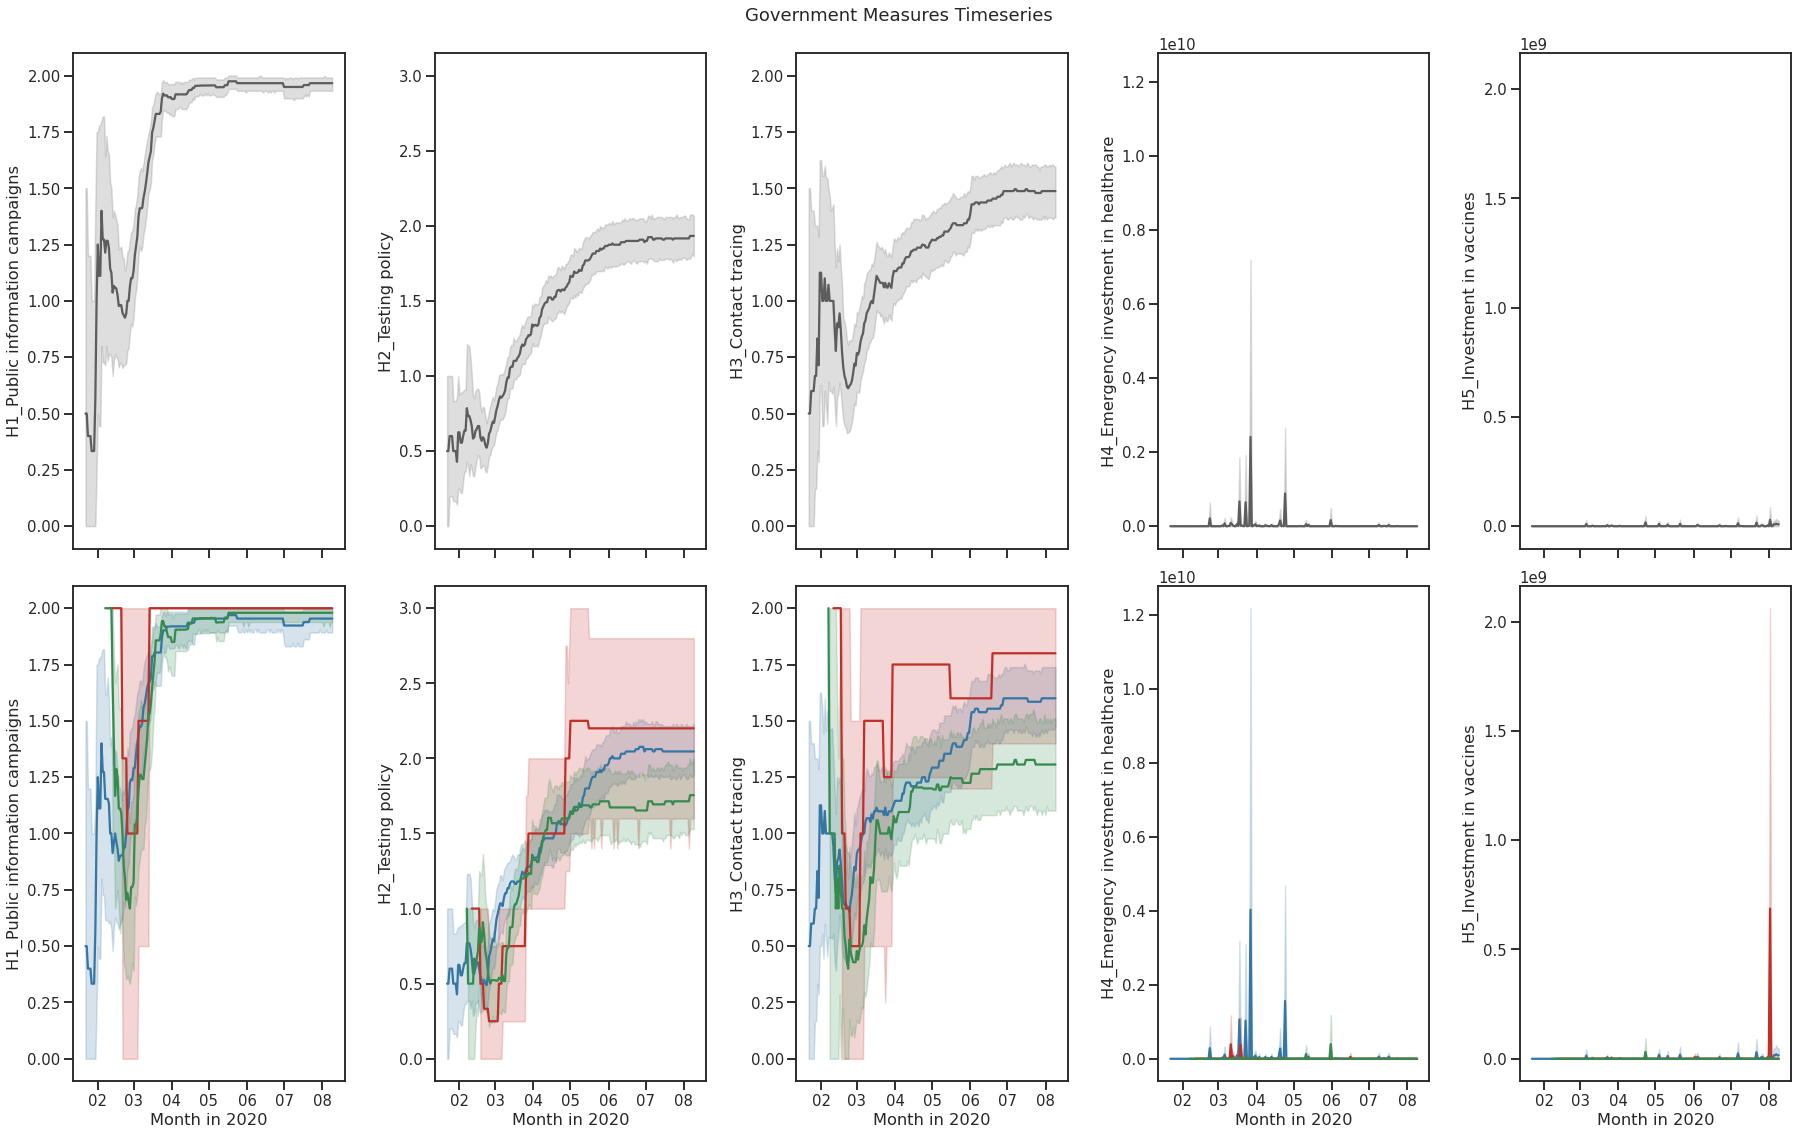

In [ ]:
# Set up the plotting 
measures = ['H1_Public information campaigns','H2_Testing policy','H3_Contact tracing','H4_Emergency investment in healthcare','H5_Investment in vaccines',]
rows = 2; cols = len(measures); fig,ax=plt.subplots(rows,cols,figsize=(len(measures)*5,rows*8),sharex=True,sharey='col')

#points = []; lines=[]
# Go through each quantized outbreak metric and make plots 
for col in range(0,cols):
  sns.lineplot(x='Date',y=measures[col],data=df7all,ax=ax[0,col],legend=False,color=sns.color_palette(palette='Greys_d',n_colors=4)[1],label='All')
  sns.lineplot(x='Date',y=measures[col],data=n_hem,ax=ax[1,col],legend=False,color=sns.color_palette(palette='Blues_d',n_colors=4)[1],label='N. Hem')
  sns.lineplot(x='Date',y=measures[col],data=s_hem,ax=ax[1,col],legend=False,color=sns.color_palette(palette='Reds_d',n_colors=4)[1],label='S. Hem')
  sns.lineplot(x='Date',y=measures[col],data=trop,ax=ax[1,col],legend=False,color=sns.color_palette(palette='Greens_d',n_colors=4)[1],label='Trop')

# Define X axis labels 
[ax.set_xlabel('Month in 2020') for ax in plt.gcf().axes]
#ax[1,0].set_xlabel('Month in 2020'); ax[3,1].set_xlabel('Month in 2020'); ax[3,2].set_xlabel('Month in 2020'); ax[3,3].set_xlabel('Month in 2020')
# Format X axis tick labels 
[ax.xaxis.set_major_formatter(md.DateFormatter('%m')) for ax in plt.gcf().axes]
# Tight layout 
fig.suptitle('Government Measures Timeseries' , fontsize=18)
fig.tight_layout(pad=0.5, w_pad=1.5, h_pad=0.8,rect=[0, 0, 1, 0.96])

# from google.colab import files
# filename = ('Supplemental_GovernmentH_Timeseries_All_NH_SH_Tr.png')
# fig.savefig(filename, dpi=300)
# files.download(filename) 

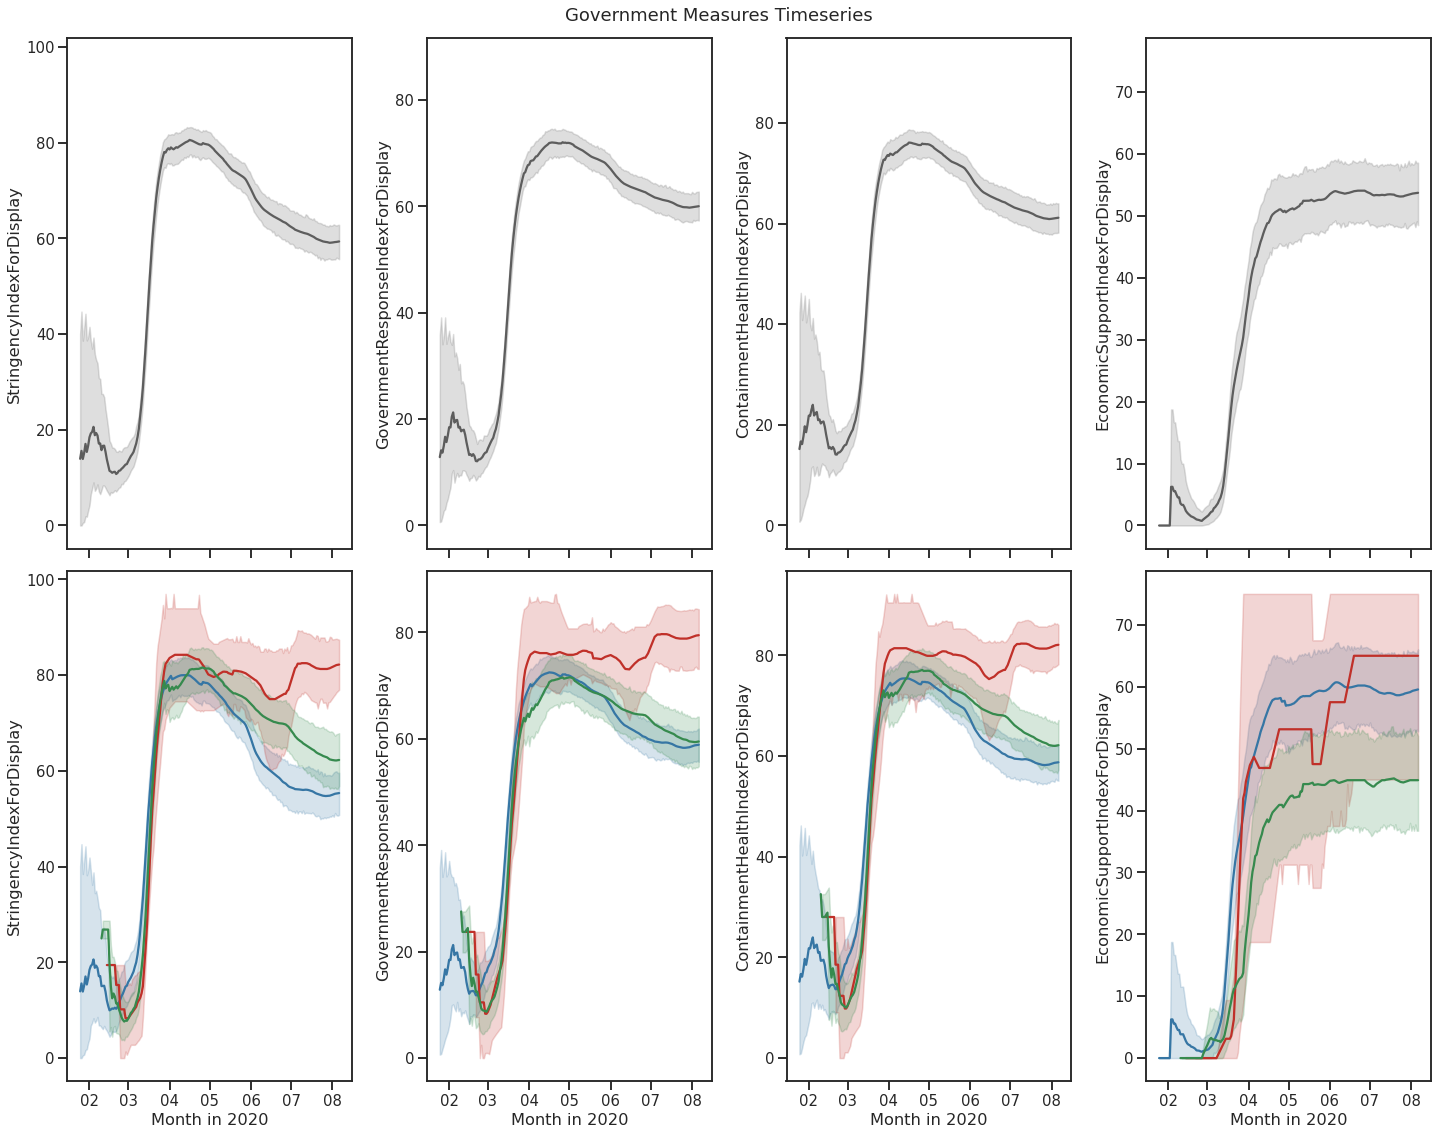

In [ ]:
# Set up the plotting 
measures = ['StringencyIndexForDisplay','GovernmentResponseIndexForDisplay','ContainmentHealthIndexForDisplay','EconomicSupportIndexForDisplay']
rows = 2; cols = len(measures); fig,ax=plt.subplots(rows,cols,figsize=(len(measures)*5,rows*8),sharex=True,sharey='col')

#points = []; lines=[]
# Go through each quantized outbreak metric and make plots 
for col in range(0,cols):
  sns.lineplot(x='Date',y=measures[col],data=df7all,ax=ax[0,col],legend=False,color=sns.color_palette(palette='Greys_d',n_colors=4)[1],label='All')
  sns.lineplot(x='Date',y=measures[col],data=n_hem,ax=ax[1,col],legend=False,color=sns.color_palette(palette='Blues_d',n_colors=4)[1],label='N. Hem')
  sns.lineplot(x='Date',y=measures[col],data=s_hem,ax=ax[1,col],legend=False,color=sns.color_palette(palette='Reds_d',n_colors=4)[1],label='S. Hem')
  sns.lineplot(x='Date',y=measures[col],data=trop,ax=ax[1,col],legend=False,color=sns.color_palette(palette='Greens_d',n_colors=4)[1],label='Trop')

# Define X axis labels 
[ax.set_xlabel('Month in 2020') for ax in plt.gcf().axes]
#ax[1,0].set_xlabel('Month in 2020'); ax[3,1].set_xlabel('Month in 2020'); ax[3,2].set_xlabel('Month in 2020'); ax[3,3].set_xlabel('Month in 2020')
# Format X axis tick labels 
[ax.xaxis.set_major_formatter(md.DateFormatter('%m')) for ax in plt.gcf().axes]
# Tight layout 
fig.suptitle('Government Measures Timeseries' , fontsize=18)
fig.tight_layout(pad=0.5, w_pad=1.5, h_pad=0.8,rect=[0, 0, 1, 0.96])

# from google.colab import files
# filename = ('Supplemental_GovernmentIndex_Timeseries_All_NH_SH_Tr.png')
# fig.savefig(filename, dpi=300)
# files.download(filename) 

In [ ]:
# Tropic of Cancer is located at 23.5 degrees north of the equator and runs through Mexico, the Bahamas, Egypt, Saudi Arabia, India, and southern China
# The Tropic of Capricorn lies at 23.5 degrees south of the equator and runs through Australia, Chile, southern Brazil, and northern South Africa

upper_lat_bound = 23.5; lower_lat_bound = -23.5 

n_hem = df[df['Lat']>upper_lat_bound]
s_hem = df[df['Lat']<lower_lat_bound]
trop  = df[(df['Lat']<upper_lat_bound) & (df['Lat']>lower_lat_bound)]

print('Total Country Count:',df['Country'].unique().shape[0])
print('Northern Hemisphere Country Count:',n_hem['Country'].unique().shape[0])
print('Southern Hemisphere Country Count:',s_hem['Country'].unique().shape[0])
print('Tropics Country Count:',trop['Country'].unique().shape[0])

In [ ]:
# Assign the region name to each country in the dataset 
df.loc[:,'Region'] = ['n_hem' if country_name in n_hem['Country'].unique() else # assigned n_hem if its in the list of northern hemisphere countries 
                      's_hem' if country_name in s_hem['Country'].unique() else # assigned s_hem if its in the list of southern hemisphere countries 
                      'trop' # assigned tropical if its neigher northern or southern hemisphere 
                      for country_name in df.loc[:,'Country']]

# df7.loc[:,'Region'] = ['n_hem' if country_name in n_hem['Country'].unique() else 's_hem' if country_name in s_hem['Country'].unique() else 'trop' for country_name in df7.loc[:,'Country']]
df7all.loc[:,'Region'] = ['n_hem' if country_name in n_hem['Country'].unique() else 's_hem' if country_name in s_hem['Country'].unique() else 'trop' for country_name in df7all.loc[:,'Country']]
# downsampled_df.loc[:,'Region'] = ['n_hem' if country_name in n_hem['Country'].unique() else 's_hem' if country_name in s_hem['Country'].unique() else 'trop' for country_name in downsampled_df.loc[:,'Country']]

In [ ]:
# Set seaborn plotting style 
sns.set(context='talk', font_scale=0.9, style='ticks', palette='Blues_d')

In [ ]:
# Function to create lags of a given variable 

def make_lags(dataframe,merging_var,variable,num_lags):
  df = dataframe[['Country',merging_var,variable]].copy() # Make a copy of the country (for grouping) and the variable to be lagged  

  for i in range(1,num_lags+1):
    df[variable+'_lag{}'.format(i)] = df.groupby('Country')[variable].shift(i) # Create all of the lags of the given input variable 

  return df

In [ ]:
# Function to create a dataframe with lagged versions of the variable and the actual outbreak metrics 

def lagged_var_df(dataframe,merging_var,variable,num_lags,COVIDstats):

  df = dataframe.copy()

  outcomes = df[COVIDstats]

  lagged_variables = make_lags(dataframe,merging_var,variable,num_lags)

  merged = lagged_variables.merge(right=outcomes,how='left',on=['Country',merging_var])

  return merged

In [ ]:
# Run the function 
COVIDstats = ['Country','Days From 5th Death','total_cases', 'total_cases_per_million', 'new_cases', # Add country and date so there can be correct merging on keys 
       'new_cases_per_million', 'total_deaths', 'total_deaths_per_million',
       'total_deaths_pctchange', 'total_deaths_per_million_pctchange',
       'new_deaths', 'new_deaths_per_million', 'new_deaths_diff',
       'new_deaths_per_million_diff', 'new_deaths_pctchange',
       'new_deaths_per_million_pctchange']

lagged_df7all = lagged_var_df(df7all,'Days From 5th Death','IndoorRH_pct',28,COVIDstats)

In [ ]:
def quantizer(dataframe, first_day, last_day, qlevels, countries, retbins):

  # Dataframe to use for plotting -> Set lower and upper bound for days from 5th death, only use the selected list of countries (could be all, n_hem, s_hem, trop, or for a given month)
  df = dataframe[(dataframe['Days From 5th Death'].ge(first_day)) & (dataframe['Days From 5th Death'].le(last_day)) & (dataframe['Country'].isin(countries))].copy()

  if retbins == True: # return the bin ranges and label each category with the bin range 
    # Apply qcut to break the outbreak metrics into different evenly-distributed quantiles 
    df.loc[:,'new_cases_Qlevels'] = pd.qcut(x=df.loc[:,'new_cases'],q=qlevels,retbins=True,precision=1,duplicates='drop')[0]
    df.loc[:,'new_deaths_Qlevels'] = pd.qcut(x=df.loc[:,'new_deaths'],q=qlevels,retbins=True,precision=1,duplicates='drop')[0]
    df.loc[:,'new_deaths_diff_Qlevels'] = pd.qcut(x=df.loc[:,'new_deaths_diff'],q=qlevels,retbins=True,precision=1,duplicates='drop')[0]
    df.loc[:,'new_deaths_pctchange_Qlevels'] = pd.qcut(x=df.loc[:,'new_deaths_pctchange'],q=qlevels,retbins=True,precision=1,duplicates='drop')[0]
  
  else: # don't retun the bin ranges and label each category with an integer
    # Apply qcut to break the outbreak metrics into different evenly-distributed quantiles 
    df.loc[:,'new_cases_Qlevels'] = pd.qcut(x=df.loc[:,'new_cases'],q=qlevels,duplicates='drop',labels=False).astype('category')
    df.loc[:,'new_deaths_Qlevels'] = pd.qcut(x=df.loc[:,'new_deaths'],q=qlevels,duplicates='drop',labels=False).astype('category')
    df.loc[:,'new_deaths_diff_Qlevels'] = pd.qcut(x=df.loc[:,'new_deaths_diff'],q=qlevels,duplicates='drop',labels=False).astype('category')
    df.loc[:,'new_deaths_pctchange_Qlevels'] = pd.qcut(x=df.loc[:,'new_deaths_pctchange'],q=qlevels,duplicates='drop',labels=False).astype('category')

  return df

In [ ]:
# Discretize the treatment  

bins = [0,40,60,100] # How to break up the continuous variable (0-40),(40-60),(60-100)
labels = [0,1,2] # How to label the bins 
lagged_df7all['quantized_IndRH'] = pd.cut(lagged_df7all['IndoorRH_pct'],bins=bins,labels=labels) # Use cut to break up the continuous data 
lagged_df7all['quantized_IndRH_lag7'] = pd.cut(lagged_df7all['IndoorRH_pct_lag7'],bins=bins,labels=labels) # Use cut to break up the continuous data 
lagged_df7all['quantized_IndRH_lag14'] = pd.cut(lagged_df7all['IndoorRH_pct_lag14'],bins=bins,labels=labels) # Use cut to break up the continuous data 
lagged_df7all['quantized_IndRH_lag21'] = pd.cut(lagged_df7all['IndoorRH_pct_lag21'],bins=bins,labels=labels) # Use cut to break up the continuous data 

# Binarize the treatment (so <40 and >60 are untreated, 40-60 are treated) 
binary_treatment = lagged_df7all.copy()
binary_treatment.loc[:,['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']] = binary_treatment.loc[:,['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']].replace(2,0)

# Binarize the outbreak metrics 
first_day = 0; last_day = 120; qlevels=2
lagged_df7all_q = quantizer(dataframe=lagged_df7all, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=lagged_df7all['Country'].unique(), retbins=False)
binary_treatment_q = quantizer(dataframe=binary_treatment, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=lagged_df7all['Country'].unique(), retbins=False)

In [ ]:
import statsmodels.api as sm

def oddsratio(dataset,outcome,treatment):
  
  data = dataset[[outcome,treatment]].copy() # Copy dataset 

  contig_table = pd.crosstab(data[outcome],data[treatment]).iloc[::-1,] # Make a 2x2 contingency table, 00 = Bad Outcome/No Treatment, 10 = Good Outcome/No Treatment, 01 = Bad Outcome/Treatment, 11 = Good Outcome/Treatment 
  #print(contig_table)

  table = sm.stats.Table2x2(np.asarray(contig_table)) # Use statsmodels to turn the contingency table into a special 2x2 table for further statsmodels calculations 
  #print(table)

  #table=sm.stats.Table2x2.from_data(data) # Make a contingency table, 00 = Bad Outcome/No Treatment, 10 = Good Outcome/No Treatment, 01 = Bad Outcome/Treatment, 11 = Good Outcome/Treatment 

  odds_badoutcome_notreatment = contig_table.iloc[0,0]/contig_table.iloc[1,0] # Odds of having a worse outcome (e.g. more deaths) WITHOUT treatment (e.g. RH<40% or RH>60%) 
  odds_badoutcome_withtreatment = contig_table.iloc[0,1]/contig_table.iloc[1,1] # Odds of having a worse outcome (e.g. more deaths) WITH treatment (e.g. RH 40%-60%) 

  odds_ratio = table.oddsratio # Odds ratio (ratio of odds_badoutcome_notreatment to odds_badoutcome_withtreatment) -> how much more likely are you to have a bad outcome if you don't receive the treatment 
  LCB = table.oddsratio_confint()[0] # Lower 95% confidence boundary
  UCB = table.oddsratio_confint()[1] # Upper 95% confidence boundary 
  pval = table.oddsratio_pvalue() # p-value for a hypothesis test about the odds ratio

  return odds_badoutcome_notreatment, odds_badoutcome_withtreatment, odds_ratio, LCB, UCB, pval 

# To run function... 
# oddsratio(dataset=treat_total,outcome='new_cases_Qlevels',treatment='quantized_IndRH')

In [ ]:
first_day = 0; last_day = 120; qlevels=5

# Make a lagged dataframe for government response 
df_for_gov_lagged = lagged_var_df(df7all,'Days From 5th Death','GovernmentResponseIndexForDisplay',28,COVIDstats)

# Cut the dataframe at the defined normalized timepoints 
df_for_gov = df_for_gov_lagged[(df_for_gov_lagged['Days From 5th Death'].ge(first_day)) & (df_for_gov_lagged['Days From 5th Death'].le(last_day)) & (df_for_gov_lagged['Country'].isin(df7all.Country.unique())) ].copy()

# Discretize the lagged government responses (quantiles)
df_for_gov['govresp_quantiles'] = pd.qcut(df_for_gov['GovernmentResponseIndexForDisplay'],q=qlevels,retbins=False,labels=False)
df_for_gov['govresp_quantiles_lag7'] = pd.qcut(df_for_gov['GovernmentResponseIndexForDisplay_lag7'],q=qlevels,retbins=False,labels=False)
df_for_gov['govresp_quantiles_lag14'] = pd.qcut(df_for_gov['GovernmentResponseIndexForDisplay_lag14'],q=qlevels,retbins=False,labels=False)
df_for_gov['govresp_quantiles_lag21'] = pd.qcut(df_for_gov['GovernmentResponseIndexForDisplay_lag21'],q=qlevels,retbins=False,labels=False)

# Discretize the lagged government responses (bins)
df_for_gov['govresp_bins'] = pd.cut(df_for_gov['GovernmentResponseIndexForDisplay'],bins=qlevels,retbins=False,labels=False)
df_for_gov['govresp_bins_lag7'] = pd.cut(df_for_gov['GovernmentResponseIndexForDisplay_lag7'],bins=qlevels,retbins=False,labels=False)
df_for_gov['govresp_bins_lag14'] = pd.cut(df_for_gov['GovernmentResponseIndexForDisplay_lag14'],bins=qlevels,retbins=False,labels=False)
df_for_gov['govresp_bins_lag21'] = pd.cut(df_for_gov['GovernmentResponseIndexForDisplay_lag21'],bins=qlevels,retbins=False,labels=False)

# Add the lagged, discretized government response indices to the binarized treatment dataframe 
df_quantizedgov = pd.merge(binary_treatment, df_for_gov[['Country','Days From 5th Death','govresp_quantiles','govresp_quantiles_lag7','govresp_quantiles_lag14','govresp_quantiles_lag21','govresp_bins','govresp_bins_lag7','govresp_bins_lag14','govresp_bins_lag21']],on=['Country','Days From 5th Death'])

In [ ]:
# Compute odds ratios by gov stringency quantiles (All Countries, quantiles 1 through 5) 

first_day = 0; last_day = 120; qlevels=2
treat_total = quantizer(dataframe=binary_treatment, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()

# Horrible hard coding... sorry to anyone reading this 
treat_1stq = quantizer(dataframe=df_quantizedgov[df_quantizedgov['govresp_quantiles']==0], first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_2ndq = quantizer(dataframe=df_quantizedgov[df_quantizedgov['govresp_quantiles']==1], first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_3rdq = quantizer(dataframe=df_quantizedgov[df_quantizedgov['govresp_quantiles']==2], first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_4thq = quantizer(dataframe=df_quantizedgov[df_quantizedgov['govresp_quantiles']==3], first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_5thq = quantizer(dataframe=df_quantizedgov[df_quantizedgov['govresp_quantiles']==4], first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()

treat_1stq_lag7 = quantizer(dataframe=df_quantizedgov[df_quantizedgov['govresp_quantiles_lag7']==0], first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_2ndq_lag7 = quantizer(dataframe=df_quantizedgov[df_quantizedgov['govresp_quantiles_lag7']==1], first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_3rdq_lag7 = quantizer(dataframe=df_quantizedgov[df_quantizedgov['govresp_quantiles_lag7']==2], first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_4thq_lag7 = quantizer(dataframe=df_quantizedgov[df_quantizedgov['govresp_quantiles_lag7']==3], first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_5thq_lag7 = quantizer(dataframe=df_quantizedgov[df_quantizedgov['govresp_quantiles_lag7']==4], first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()

treat_1stq_lag14 = quantizer(dataframe=df_quantizedgov[df_quantizedgov['govresp_quantiles_lag14']==0], first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_2ndq_lag14 = quantizer(dataframe=df_quantizedgov[df_quantizedgov['govresp_quantiles_lag14']==1], first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_3rdq_lag14 = quantizer(dataframe=df_quantizedgov[df_quantizedgov['govresp_quantiles_lag14']==2], first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_4thq_lag14 = quantizer(dataframe=df_quantizedgov[df_quantizedgov['govresp_quantiles_lag14']==3], first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_5thq_lag14 = quantizer(dataframe=df_quantizedgov[df_quantizedgov['govresp_quantiles_lag14']==4], first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()

treat_1stq_lag21 = quantizer(dataframe=df_quantizedgov[df_quantizedgov['govresp_quantiles_lag21']==0], first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_2ndq_lag21 = quantizer(dataframe=df_quantizedgov[df_quantizedgov['govresp_quantiles_lag21']==1], first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_3rdq_lag21 = quantizer(dataframe=df_quantizedgov[df_quantizedgov['govresp_quantiles_lag21']==2], first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_4thq_lag21 = quantizer(dataframe=df_quantizedgov[df_quantizedgov['govresp_quantiles_lag21']==3], first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_5thq_lag21 = quantizer(dataframe=df_quantizedgov[df_quantizedgov['govresp_quantiles_lag21']==4], first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()


quantized_outcomes = ['new_cases_Qlevels','new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels']
quantized_humidities = ['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']
#dataset_list = [treat_total, treat_1stq, treat_2ndq, treat_3rdq, treat_4thq, treat_5thq]
dataset_list = 0 
dataset_names = ['All','LowestQ','LowerQ','MiddleQ','HigherQ','HighestQ']


level3 = []
for outcome in quantized_outcomes: 

  level2 = []
  for humidity in quantized_humidities: 

    
    level1 = [] # Empty list to store each output from the primary calculations

    if 'lag' not in humidity: 
      dataset_list = [treat_total, treat_1stq, treat_2ndq, treat_3rdq, treat_4thq, treat_5thq]
    elif '7' in humidity: 
      dataset_list = [treat_total, treat_1stq_lag7, treat_2ndq_lag7, treat_3rdq_lag7, treat_4thq_lag7, treat_5thq_lag7]
    elif '14' in humidity: 
      dataset_list = [treat_total, treat_1stq_lag14, treat_2ndq_lag14, treat_3rdq_lag14, treat_4thq_lag14, treat_5thq_lag14]
    elif '21' in humidity: 
      dataset_list = [treat_total, treat_1stq_lag21, treat_2ndq_lag21, treat_3rdq_lag21, treat_4thq_lag21, treat_5thq_lag21]

    for dset in dataset_list: 

      computeOR = oddsratio(dataset=dset,outcome=outcome,treatment=humidity) # Compute the odds for NO treatment odds for WITH treatment, odds ratio, LCL, UCL, and pval

      level1.append(computeOR) # Append the output tuple to the list 

    df_level1 = pd.DataFrame(level1, columns =['oddsbad_NO_treatment', 'oddsbad_WITH_treatment', 'odds_ratio','LCL','UCL','pval'],index=dataset_names) # Put all outputs into a labeled dataframe

    level2.append(df_level1) # Put the labeled output dataframe (calculations for each region) into the list of dataframes in level 2 (calculations for each time-lagged humidity value) 
  
  df_level2 = pd.concat(level2,keys=quantized_humidities) # Put all dfs into a multi-index dataframe 

  level3.append(df_level2) # Put the multi-index dataframes (calcs for each region and each time-lag) into the list of dataframes in level 3(calculations for each COVID-19 outbreak metric) 

df_ORs_bygovstringQ = pd.concat(level3, keys=quantized_outcomes) # Put all of the multi-index dataframes into a final multi-index dataframe 

print('Done')

In [ ]:
# Compute odds ratios by gov stringency bins (All Countries, bins 1 through 5) 

first_day = 0; last_day = 120; qlevels=2
treat_total = quantizer(dataframe=binary_treatment, first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()

# Horrible hard coding... sorry to anyone reading this 
treat_1stq = quantizer(dataframe=df_quantizedgov[df_quantizedgov['govresp_bins']==0], first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_2ndq = quantizer(dataframe=df_quantizedgov[df_quantizedgov['govresp_bins']==1], first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_3rdq = quantizer(dataframe=df_quantizedgov[df_quantizedgov['govresp_bins']==2], first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_4thq = quantizer(dataframe=df_quantizedgov[df_quantizedgov['govresp_bins']==3], first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_5thq = quantizer(dataframe=df_quantizedgov[df_quantizedgov['govresp_bins']==4], first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()

treat_1stq_lag7 = quantizer(dataframe=df_quantizedgov[df_quantizedgov['govresp_bins_lag7']==0], first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_2ndq_lag7 = quantizer(dataframe=df_quantizedgov[df_quantizedgov['govresp_bins_lag7']==1], first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_3rdq_lag7 = quantizer(dataframe=df_quantizedgov[df_quantizedgov['govresp_bins_lag7']==2], first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_4thq_lag7 = quantizer(dataframe=df_quantizedgov[df_quantizedgov['govresp_bins_lag7']==3], first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_5thq_lag7 = quantizer(dataframe=df_quantizedgov[df_quantizedgov['govresp_bins_lag7']==4], first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()

treat_1stq_lag14 = quantizer(dataframe=df_quantizedgov[df_quantizedgov['govresp_bins_lag14']==0], first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_2ndq_lag14 = quantizer(dataframe=df_quantizedgov[df_quantizedgov['govresp_bins_lag14']==1], first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_3rdq_lag14 = quantizer(dataframe=df_quantizedgov[df_quantizedgov['govresp_bins_lag14']==2], first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_4thq_lag14 = quantizer(dataframe=df_quantizedgov[df_quantizedgov['govresp_bins_lag14']==3], first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_5thq_lag14 = quantizer(dataframe=df_quantizedgov[df_quantizedgov['govresp_bins_lag14']==4], first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()

treat_1stq_lag21 = quantizer(dataframe=df_quantizedgov[df_quantizedgov['govresp_bins_lag21']==0], first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_2ndq_lag21 = quantizer(dataframe=df_quantizedgov[df_quantizedgov['govresp_bins_lag21']==1], first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_3rdq_lag21 = quantizer(dataframe=df_quantizedgov[df_quantizedgov['govresp_bins_lag21']==2], first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_4thq_lag21 = quantizer(dataframe=df_quantizedgov[df_quantizedgov['govresp_bins_lag21']==3], first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()
treat_5thq_lag21 = quantizer(dataframe=df_quantizedgov[df_quantizedgov['govresp_bins_lag21']==4], first_day=first_day, last_day=last_day, qlevels=qlevels, countries=df7all['Country'].unique(), retbins=False).dropna()


quantized_outcomes = ['new_cases_Qlevels','new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels']
quantized_humidities = ['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']
#dataset_list = [treat_total, treat_1stq, treat_2ndq, treat_3rdq, treat_4thq, treat_5thq]
dataset_list = 0 
dataset_names = ['All','LowestB','LowerB','MiddleB','HigherB','HighestB']


level3 = []
for outcome in quantized_outcomes: 

  level2 = []
  for humidity in quantized_humidities: 

    
    level1 = [] # Empty list to store each output from the primary calculations

    if 'lag' not in humidity: 
      dataset_list = [treat_total, treat_1stq, treat_2ndq, treat_3rdq, treat_4thq, treat_5thq]
    elif '7' in humidity: 
      dataset_list = [treat_total, treat_1stq_lag7, treat_2ndq_lag7, treat_3rdq_lag7, treat_4thq_lag7, treat_5thq_lag7]
    elif '14' in humidity: 
      dataset_list = [treat_total, treat_1stq_lag14, treat_2ndq_lag14, treat_3rdq_lag14, treat_4thq_lag14, treat_5thq_lag14]
    elif '21' in humidity: 
      dataset_list = [treat_total, treat_1stq_lag21, treat_2ndq_lag21, treat_3rdq_lag21, treat_4thq_lag21, treat_5thq_lag21]

    for dset in dataset_list: 

      computeOR = oddsratio(dataset=dset,outcome=outcome,treatment=humidity) # Compute the odds for NO treatment odds for WITH treatment, odds ratio, LCL, UCL, and pval

      level1.append(computeOR) # Append the output tuple to the list 

    df_level1 = pd.DataFrame(level1, columns =['oddsbad_NO_treatment', 'oddsbad_WITH_treatment', 'odds_ratio','LCL','UCL','pval'],index=dataset_names) # Put all outputs into a labeled dataframe

    level2.append(df_level1) # Put the labeled output dataframe (calculations for each region) into the list of dataframes in level 2 (calculations for each time-lagged humidity value) 
  
  df_level2 = pd.concat(level2,keys=quantized_humidities) # Put all dfs into a multi-index dataframe 

  level3.append(df_level2) # Put the multi-index dataframes (calcs for each region and each time-lag) into the list of dataframes in level 3(calculations for each COVID-19 outbreak metric) 

df_ORs_bygovstringB = pd.concat(level3, keys=quantized_outcomes) # Put all of the multi-index dataframes into a final multi-index dataframe 

print('Done')

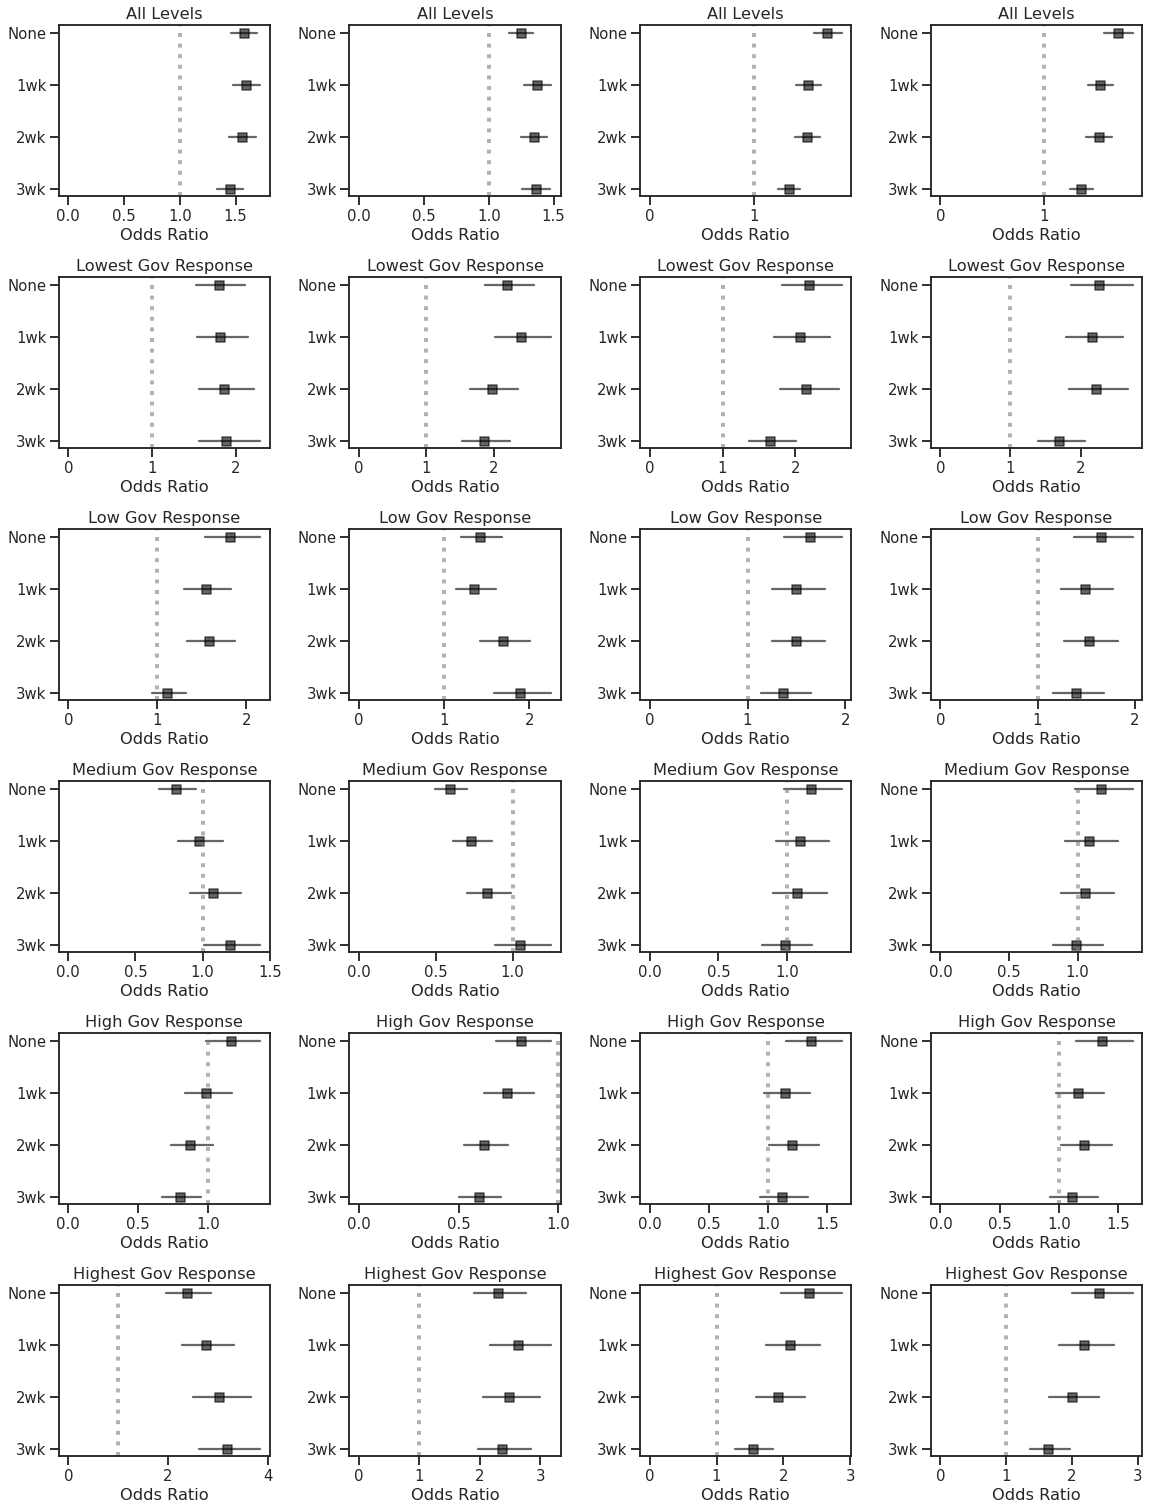

In [ ]:

# Set up the plotting 
quantized_outcomes = ['new_cases_Qlevels','new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels']
quantized_humidities = ['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']
dataset_names = ['All','LowestQ','LowerQ','MiddleQ','HigherQ','HighestQ']


rows = len(dataset_names); cols = len(quantized_outcomes); fig,ax=plt.subplots(rows,cols,figsize=(16,21))

# Go through each quantized outbreak metric and make plots 
for col in range(0,cols):
  for lag in range(len(quantized_humidities)):
    for region in range(len(dataset_names)):
      data_for_plotting = df_ORs_bygovstringQ.loc[(quantized_outcomes[col],quantized_humidities[lag],dataset_names[region])]
      ax[region,col].scatter(data_for_plotting['odds_ratio'],lag,marker='s',color='k',alpha=0.6)
      ax[region,col].plot([data_for_plotting['LCL'],data_for_plotting['UCL']],[lag,lag],color='k',alpha=0.6)
      ax[region,col].set_yticks(range(0,len(quantized_humidities)))
      ax[region,col].set_yticklabels(['None','1wk','2wk','3wk'])

[ax[0,c].set_title('All Levels') for c in np.arange(0,4)]
[ax[1,c].set_title('Lowest Gov Response') for c in np.arange(0,4)]
[ax[2,c].set_title('Low Gov Response') for c in np.arange(0,4)]
[ax[3,c].set_title('Medium Gov Response') for c in np.arange(0,4)]
[ax[4,c].set_title('High Gov Response') for c in np.arange(0,4)]
[ax[5,c].set_title('Highest Gov Response') for c in np.arange(0,4)]

[ax.set_xlabel('Odds Ratio') for ax in plt.gcf().axes]

# [ax[0,c].set_xlim(0,2) for c in np.arange(0,4)]
# [ax[1,c].set_xlim(0,3) for c in np.arange(0,4)]
# [ax[2,c].set_xlim(0,15) for c in np.arange(0,4)]
# [ax[3,c].set_xlim(0,3) for c in np.arange(0,4)]


[ax.axvline(x=0,color='grey',alpha=0.0,linewidth=0) for ax in plt.gcf().axes]
[ax.axvline(x=1,linestyle=':',color='grey',alpha=0.6,linewidth=4) for ax in plt.gcf().axes]
[ax.invert_yaxis() for ax in plt.gcf().axes]
fig.tight_layout(pad=0.5,h_pad=1,w_pad=1)

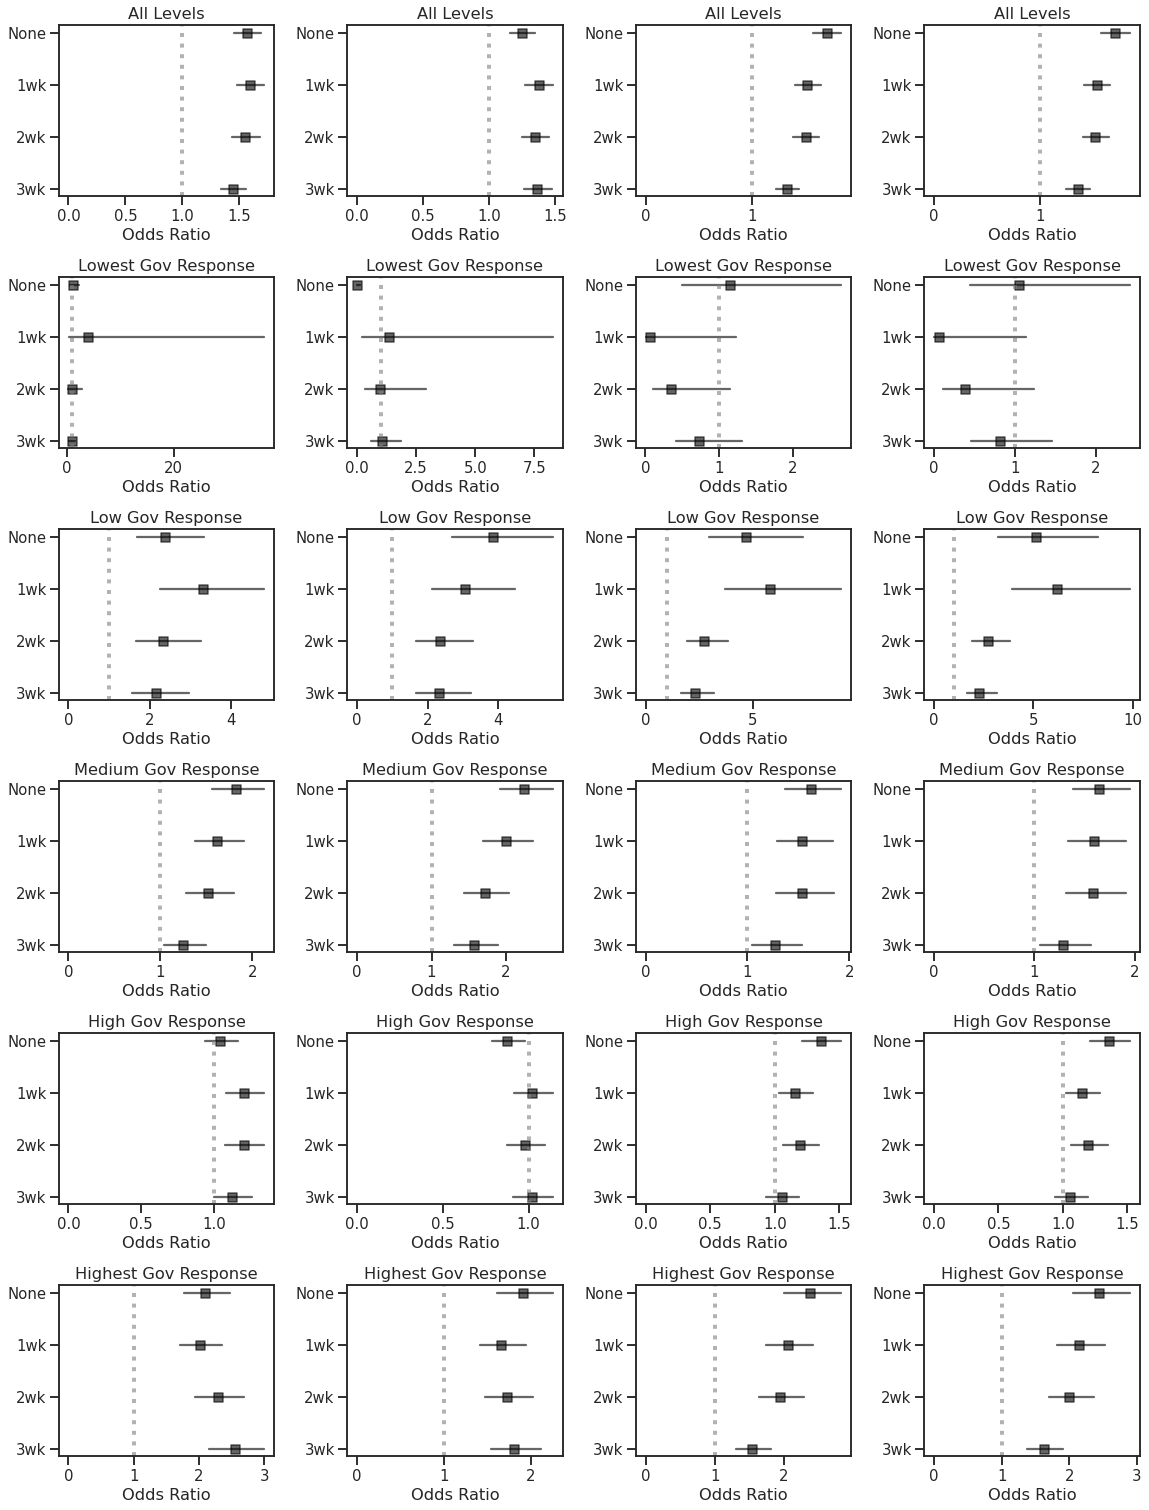

In [ ]:

# Set up the plotting 
quantized_outcomes = ['new_cases_Qlevels','new_deaths_Qlevels','new_deaths_diff_Qlevels','new_deaths_pctchange_Qlevels']
quantized_humidities = ['quantized_IndRH','quantized_IndRH_lag7','quantized_IndRH_lag14','quantized_IndRH_lag21']
dataset_names = ['All','LowestB','LowerB','MiddleB','HigherB','HighestB']


rows = len(dataset_names); cols = len(quantized_outcomes); fig,ax=plt.subplots(rows,cols,figsize=(16,21))

# Go through each quantized outbreak metric and make plots 
for col in range(0,cols):
  for lag in range(len(quantized_humidities)):
    for region in range(len(dataset_names)):
      data_for_plotting = df_ORs_bygovstringB.loc[(quantized_outcomes[col],quantized_humidities[lag],dataset_names[region])]
      ax[region,col].scatter(data_for_plotting['odds_ratio'],lag,marker='s',color='k',alpha=0.6)
      ax[region,col].plot([data_for_plotting['LCL'],data_for_plotting['UCL']],[lag,lag],color='k',alpha=0.6)
      ax[region,col].set_yticks(range(0,len(quantized_humidities)))
      ax[region,col].set_yticklabels(['None','1wk','2wk','3wk'])

[ax[0,c].set_title('All Levels') for c in np.arange(0,4)]
[ax[1,c].set_title('Lowest Gov Response') for c in np.arange(0,4)]
[ax[2,c].set_title('Low Gov Response') for c in np.arange(0,4)]
[ax[3,c].set_title('Medium Gov Response') for c in np.arange(0,4)]
[ax[4,c].set_title('High Gov Response') for c in np.arange(0,4)]
[ax[5,c].set_title('Highest Gov Response') for c in np.arange(0,4)]

[ax.set_xlabel('Odds Ratio') for ax in plt.gcf().axes]

# [ax[0,c].set_xlim(0,2) for c in np.arange(0,4)]
# [ax[1,c].set_xlim(0,3) for c in np.arange(0,4)]
# [ax[2,c].set_xlim(0,15) for c in np.arange(0,4)]
# [ax[3,c].set_xlim(0,3) for c in np.arange(0,4)]


[ax.axvline(x=0,color='grey',alpha=0.0,linewidth=0) for ax in plt.gcf().axes]
[ax.axvline(x=1,linestyle=':',color='grey',alpha=0.6,linewidth=4) for ax in plt.gcf().axes]
[ax.invert_yaxis() for ax in plt.gcf().axes]
fig.tight_layout(pad=0.5,h_pad=1,w_pad=1)